# 회귀분석 실기 주제

- 가정검토(선형성, 등분산성-잔차도, 정규성-히스토그램/QQplot/Shapiro-wilk, 오차항의 독립성-더빈왓슨검정)
- 단순선형회귀분석(회귀계수 검정, 결정계수 계산-SST/SSR/SSE, 회귀직선의 적합도 검토)
- 다중선형회귀분석(회귀계수 검정, 회귀식, 결정계수 계산, 모형의 통계적 유의성, 교호작용, 다중공선성-PCA회귀, VIF 상위변수 제거)
- 다항회귀분석
- 스플라인 회귀
- 로지스틱 회귀
- 최적회귀방정식(전진선택법, 후진제거법, 단계적선택법 - AIC/BIC)
- 정규화 선형회귀 Regularized Linear Regression (Ridge회귀, Lasso회귀, Elastic Net 회귀)
- 일반화 선형회귀 Generalized Linear Regression
- 회귀분석의 기울기에 영향을 주는 영향점 진단: Cook's Distance, DFBETAS, DFFITS, Leverage H
- 변수 선택의 기준: 결정계수, Mallow's Cp, AIC/BIC

###### 결정계수 

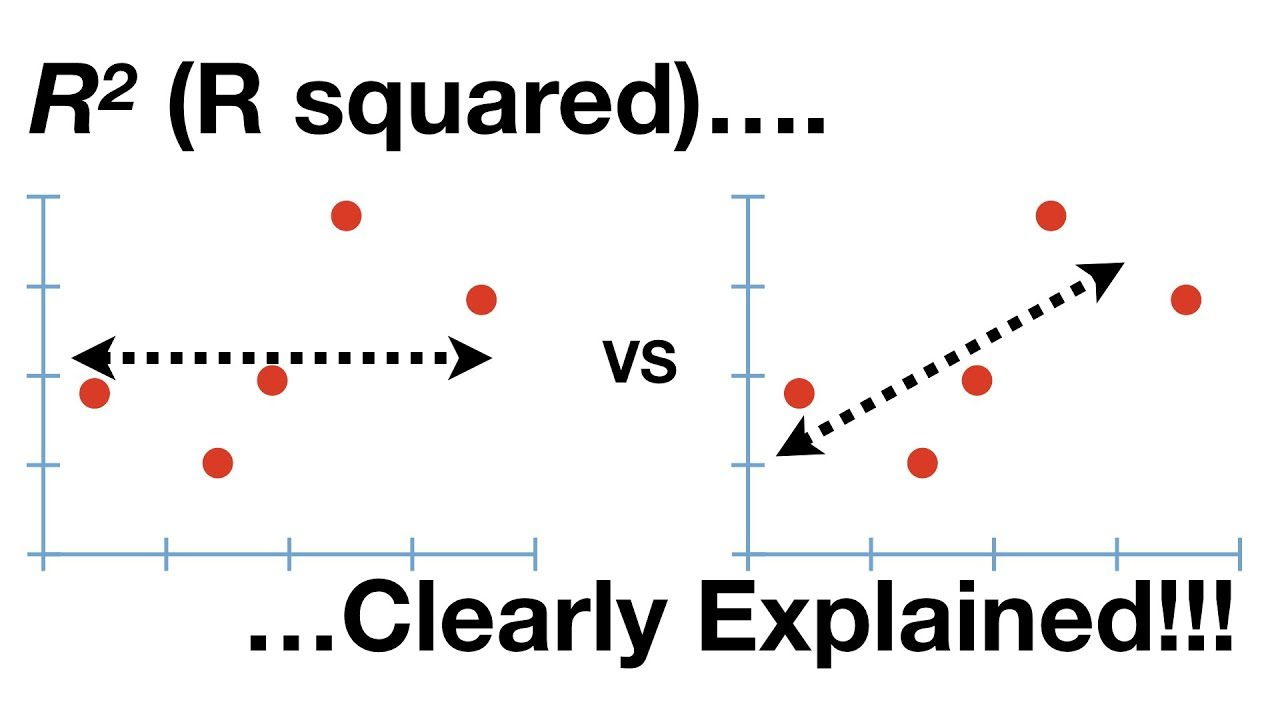

- 전체 분산에서 새로운 모델에 남은 분산을 제외한 비율
- 입력에 상관없이 '평균'을 Output하는 모델의 분산에서 입력에 따라 특정한 기울기로 변하는 값을 Output하는 모델의 분산을 제외한 비율

###### RMSE

기울기가 우연인지 아닌지 파악하는 기준

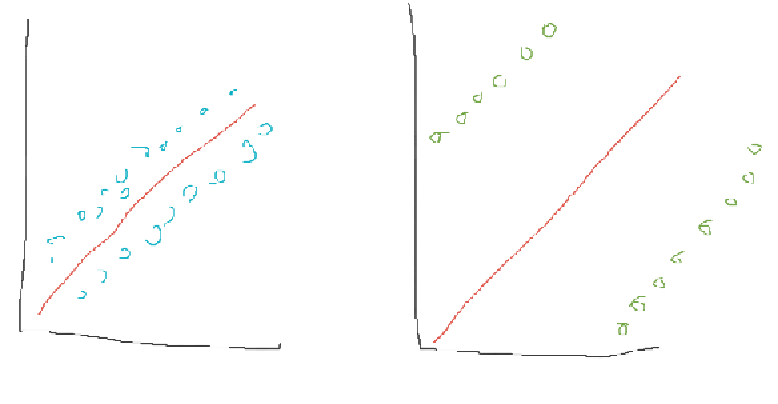

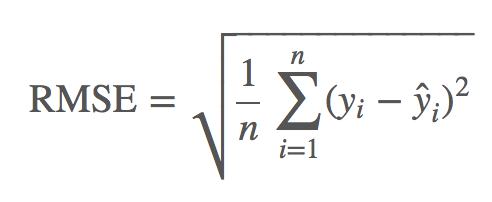

오차의 제곱의 평균에 Root를 씌운 값

### Data Load 

###### 보스턴 주택 데이터

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm  # 통계기법 활용 
from sklearn.model_selection import train_test_split 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

from sklearn.metrics import confusion_matrix, mean_squared_error

# 경로 수정 필요 
boston = pd.read_csv("~/aiffel/Kaggle/Kaggle_data/Boston_house.csv") 

### 1. 단순선형회귀

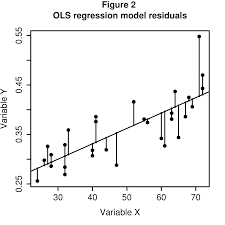

제곱이 최소가 되는 직선(w*x + b)를 찾는다

##### 문제 예시

데이터 8:2로 분할하고 선형회귀 적용. 결정계수와 rmse 구하기.  
(독립변수를 범죄율로 가정하고 진행)

In [2]:
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [3]:
# Target 제외한 데이터만 뽑기
boston_data = boston.drop(["Target"],axis=1)  

# Data 통계 뽑아보기
boston_data.describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,6.284634,3.613524,3.795043,11.136779,12.653063,0.554695,18.455534,9.549407,11.363636,408.237154,0.069170
std,28.148861,91.294864,0.702617,8.601545,2.105710,6.860353,7.141062,0.115878,2.164946,8.707259,23.322453,168.537116,0.253994
min,2.900000,0.320000,3.561000,0.006320,1.129600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000
25%,45.025000,375.377500,5.885500,0.082045,2.100175,5.190000,6.950000,0.449000,17.400000,4.000000,0.000000,279.000000,0.000000
50%,77.500000,391.440000,6.208500,0.256510,3.207450,9.690000,11.360000,0.538000,19.050000,5.000000,0.000000,330.000000,0.000000
75%,94.075000,396.225000,6.623500,3.677083,5.188425,18.100000,16.955000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000
max,100.000000,396.900000,8.780000,88.976200,12.126500,27.740000,37.970000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000


In [4]:
# crim 변수로 단순 선형 회귀분석 진행

target = boston[['Target']] # 1978 보스턴 주택 가격
crim = boston[['CRIM']]     # 범죄율
rm = boston[['RM']]         # 주택당 방 수 
lstat = boston[['LSTAT']]   # 인구 중 하위 계층 비율 

# 여기서 boston data에 존재하는 column을 지정할 때, 대괄호 두 개를 사용한 것(df[["colname"]])은
# 데이터 프레임의 개별 컬럼데이터를 Series 형태가 아닌 DataFrame형태로 추출하고자 함
# df["colname"] - Series Type / df[["colname"]] - DataFrame Type

###### 가정검토 (선형성)

범죄율이 증가할수록 집 값이 하락하는 경향성 파악

Text(0.5, 1.0, 'Criminal Rate & House Price')

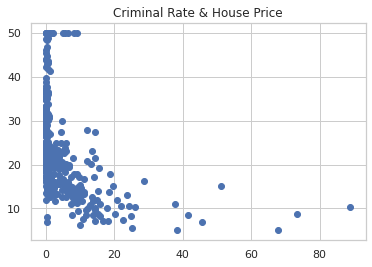

In [5]:
# Linear Regression 시행하기 전에 산포도를 그려야 한다 
# 산포도 상에서 데이터가 2차 곡선이나, 원 모양의 군집으로 나오면 Linear Regression을 진행할 필요 X
plt.scatter(crim, target)
plt.title('Criminal Rate & House Price')

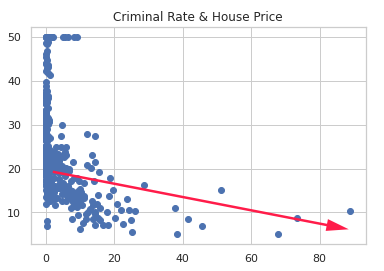

In [6]:
# 참고 : 시계열 데이터는 무작위로 데이터를 나누면 안되고, 시간 특성을 고려해주어야 한다. (자세한 내용은 시계열 회차에서) 
# 이후의 다중회귀분석을 위해, train 데이터에 범죄율 데이터만 포함하지는 않았다. 
x_train, x_test, y_train, y_test = train_test_split(boston_data, target, test_size = 0.2, shuffle = True, random_state = 2022)

In [7]:
# sm.add_constant 결과와 비교하기 위함 
x_train[['CRIM']][:5]

,CRIM
256,0.01538
288,0.04590
318,0.40202
136,0.32264
233,0.33147


In [9]:
# target ~ crim 선형회귀분석

# crim DataFrame에 선형회귀분석을 위한 b0항 (상수항)을 더해준다.
# https://www.statsmodels.org/devel/generated/statsmodels.tools.tools.add_constant.html
crim1 = sm.add_constant(x_train[['CRIM']], has_constant = "add") 
crim1 

,const,CRIM
256,1.0,0.01538
288,1.0,0.04590
318,1.0,0.40202
136,1.0,0.32264
233,1.0,0.33147
...,...,...
177,1.0,0.05425
112,1.0,0.12329
173,1.0,0.09178
220,1.0,0.35809


###### 상수항 결합(Bias Augmentation) : 일차함수( a*x + b ) 스타일이 아니라, Matrix의 곱 형태로 나타내기 위해  
상수항이 0이 아닌 회귀분석모형인 경우 수식을 간단하게 만들기 위해 다음과 같이 상수항을 독립변수에 추가한다
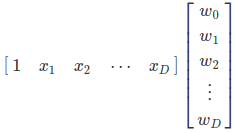

https://datascienceschool.net/03%20machine%20learning/04.02%20%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%EC%9D%98%20%EA%B8%B0%EC%B4%88.html

In [11]:
# sm OLS(Ordinary Least Squares 최소자승법) 
model1 = sm.OLS(y_train, crim1)
fitted_model1 = model1.fit()

# summary 함수통해 결과출력
fitted_model1.summary()

# OLS를 통해 출력된 summary에는 Warning이 있다. 이는 잔차항(에러항)이 정규분포/등분산을 가정한 결과이다. 
# 즉, 그렇기에 잘못된 결과가 도출될 수도 있다.
# 실제 데이터를 활용할 때는 데이터셋을 확인하는 작업을 통해 모델을 달리하거나,
# 전처리를 통해 데이터를 가공해 줄 필요가 있다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     59.48
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           9.83e-14
Time:                        05:38:45   Log-Likelihood:                -1445.9
No. Observations:                 404   AIC:                             2896.
Df Residuals:                     402   BIC:                             2904.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.3018      0.462     52.627      0.000      23.394      25.210
CRIM          -0.3804      0.049     -7.712      0.000      -0.477      -0.283
==============================================================================
Omnibus:                      109.769   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.287
Skew:                           1.482   Prob(JB):                     1.08e-47
Kurtosis:                       5.014   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

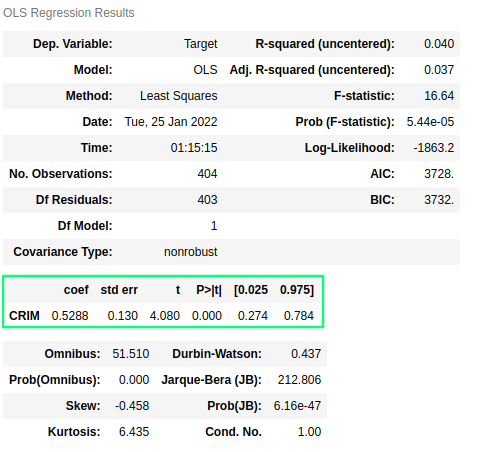

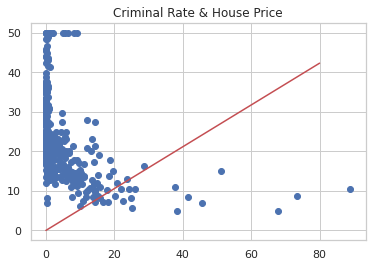

In [12]:
# 상수항 결합 안할 시 엉뚱한 그림 나온다

plt.scatter(crim, target)
plt.title('Criminal Rate & House Price')

x = np.linspace(0,80,100)
y = 0.5288 * x
plt.plot(x, y, '-r', label='No Bias Augmentation')

Adj. R-squared : 독립변수의 무분별한 증가에 희해 Variance가 감소하는 현상을 방지하기 위해, 자유도(Degree of Freedom)를 감안한 지표 

In [13]:
# 회귀 계수 출력
fitted_model1.params

const    24.301771
CRIM     -0.380431
dtype: float64

In [14]:
crim2 = sm.add_constant(x_test[['CRIM']], has_constant = "add") 
crim2

,const,CRIM
104,1.0,0.13960
406,1.0,20.71620
487,1.0,4.83567
276,1.0,0.10469
422,1.0,12.04820
...,...,...
153,1.0,2.14918
393,1.0,8.64476
326,1.0,0.30347
303,1.0,0.10000


In [15]:
# 방법1 - Y_hat = beta0 + beta1*X 계산하기
pred0 = np.dot(crim2, fitted_model1.params)

# 방법2 - predict함수를 통해 Y_hat 구하기
pred1 = fitted_model1.predict(crim2)

# numpy를 사용하여 직접구한 Y_hat과 predict함수를 통해 구한 Y_hat은 차이가 없다
pred0 - pred1     

104    0.0
406    0.0
487    0.0
276    0.0
422    0.0
      ... 
153    0.0
393    0.0
326    0.0
303    0.0
434    0.0
Length: 102, dtype: float64

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


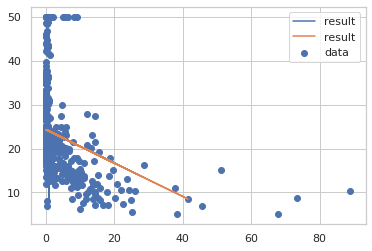

In [16]:
# 적합시킨 직선 시각화
import matplotlib.pyplot as plt                     # 파이썬 시각화 라이브러리 
 
plt.yticks(fontname = "Arial")                      
plt.scatter(crim,target,label="data")               # 실제 데이터 분포를 알아보기 위한산점도 표기 방법이다. 
                                                    # 점의 label은 "data"로 정해주었다.
plt.plot(crim2,pred1,label = "result")               # 회귀선 표기를 위한 선형 그래프이다
                                                    # label은 "result"로 정해주었다.
plt.legend()                                        # plt.legend()함수는 범주를 plot에 그리는 함수이다.
plt.show()

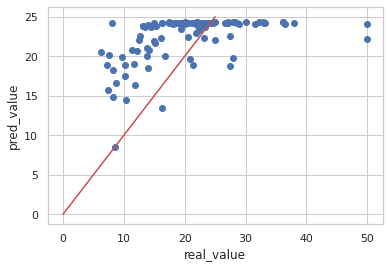

In [17]:
# 실제값과 예측(단순 선형회귀)값 비교

plt.scatter(y_test, pred1)
plt.xlabel("real_value")
plt.ylabel("pred_value")

x = np.linspace(0,25,100)
y = x
plt.plot(x, y, '-r', label='Ideal Line')

plt.show()

# 아래 그래프를 보면 단순 선형회귀가 개별 변수들을 예측하는 것에는 한계가 있음을 보인다.
# 만약 완전하게 예측을 진행한다면, Y축 값과 X축 값은 항상 같은 결과가 나와야한다.
# 즉, Y = X 그래프이어야 한다. 

# 선형 회귀분석은 사실 현실 데이터에서 추세를 알고자 하는 용도로 쓸 순 있겠지만
#, 실제로 이 회귀분석을 통해 값을 예측하고 적용하기에는 한계가 있다.

In [18]:
fitted_model1.resid.shape

(404,)

###### 잔차도  sm.graphics.plot_regress_exog( )
https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html <br/>
https://www.youtube.com/watch?v=82zCGiYRD8s&t=381s

- Partial Regression Plot : 독립변수의 개수가 많을 때 특정한 하나의 독립변수의 영향력을 시각화하는 방법 
- CCPR (Component-Component plus Residual (CCPR) Plots) : Partial Regression Plot과 마찬가지로 특정한 하나의 변수의 영향을 살펴보기 위한 것

eval_env: 1


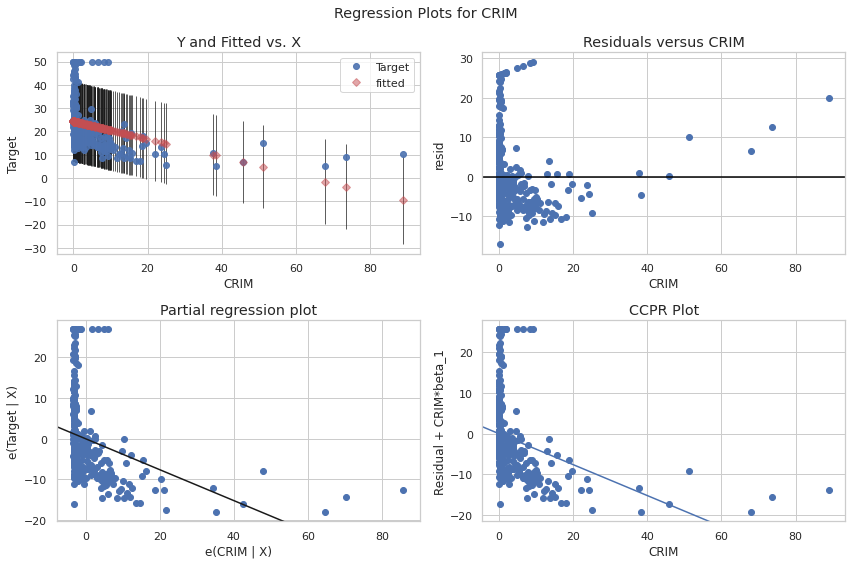

In [273]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(fitted_model1, 'CRIM', fig=fig) # sklearn 대비 장점 : 잔차도 그리기

#### partial regression plot
https://mangastorytelling.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%82%AC%EC%9D%B4%EC%96%B8%EC%8A%A4-%EC%8A%A4%EC%BF%A8-45-%EB%B6%80%EB%B6%84%ED%9A%8C%EA%B7%80-partial-regression

#### Component-Component plus Residual (CCPR) Plots
https://www.itl.nist.gov/div898/software/dataplot/refman1/auxillar/ccpr.htm

- Res : residuals from the full model
- beta_1 : regression coefficient from the ith independent variable in the full model
- X_i : the ith independent variable

###### 이분산성(Heteroskedasticity)?

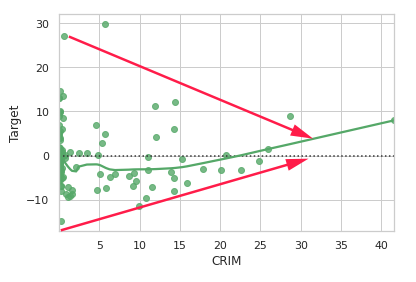

회귀계수의 표준오차(추정치의 표준편차)가 다르다  <br/>
회귀계수의 유의성을 판단하는 과정에서 t-값은 회귀계수를 표준오차로 나누는데, <br/>
표준오차가 이분산성을 가지기 때문에, 표준오차를 하나의 수로 나타낼 수 없어, <br/>
회귀계수의 유의성을 판단하기 어렵다

###### 결정계수

In [19]:
print(fitted_model1.rsquared) # 12.88%의 모델 설명력을 갖는다 

0.12888731019716126


###### RMSE

In [20]:
mean_squared_error(y_test,pred1, squared = False) # mean_squared_error(y_test,pred1) ** (1/2)와 동일하다

7.680045119680098

### 2. 다중선형회귀

Y =  a*x1 + b*x2 * c*x3 + ... + 상수항

In [21]:
boston = pd.read_csv("~/aiffel/Kaggle/Kaggle_data/Boston_house.csv") 
boston_data = boston.drop(['Target'], axis=1)

# crim, rm, lstat을 통한 다중 선형회귀분석
x_data = boston[["CRIM","RM","LSTAT"]] #변수 여러개
target = boston[["Target"]]

# for b0, 상수항 추가
x_data1 = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(target, x_data1) # 독립변수가 3개인 다중선형회귀모델
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Mon, 28 Mar 2022   Prob (F-statistic):          1.01e-112
Time:                        06:31:39   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Durbin-Watson: 
오차의 자기상관을 검정, 오차의 독립성을 만족하는지.(기준 수치는 2, 2보다 작아서 0에 가까울수록 양의 상관관계, 클수록 음의 상관관계)

###### Jarque-Bera (JB) : 정규성 검정
첨도는 3이 기준, 3보다 크면 너무 뾰족 
Prob(JB):	3.67e-137 --> 정규성을 따르지 않는다

In [22]:
# crim, rm, lstat, b ,tax ,age, zn, nox, indus 변수를 통한 다중선형회귀분석

## boston data에서 원하는 변수만 뽑아오기
x_data2 = boston[['CRIM','RM', 'LSTAT', 'B', 'TAX', 'AGE', 'ZN', 'NOX', 'INDUS']]
x_data2.head()

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
0,0.00632,6.575,4.98,396.90,296,65.2,18.0,0.538,2.31
1,0.02731,6.421,9.14,396.90,242,78.9,0.0,0.469,7.07
2,0.02729,7.185,4.03,392.83,242,61.1,0.0,0.469,7.07
3,0.03237,6.998,2.94,394.63,222,45.8,0.0,0.458,2.18
4,0.06905,7.147,5.33,396.90,222,54.2,0.0,0.458,2.18


In [23]:
# 상수항 추가
x_data2_ = sm.add_constant(x_data2, has_constant = "add")

# 회귀모델 적합
multi_model2 = sm.OLS(target, x_data2_)
fitted_multi_model2 = multi_model2.fit()

# 결과 출력
fitted_multi_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 28 Mar 2022   Prob (F-statistic):          5.76e-111
Time:                        06:32:17   Log-Likelihood:                -1565.5
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     496   BIC:                             3193.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1088      3.828     -1.857      0.064     -14.631       0.413
CRIM          -0.0453      0.036     -1.269      0.205      -0.115       0.025
RM             5.0922      0.458     11.109      0.000       4.192       5.993
LSTAT         -0.5651      0.057     -9.854      0.000      -0.678      -0.452
B              0.0090      0.003      2.952      0.003       0.003       0.015
TAX           -0.0060      0.002     -2.480      0.013      -0.011      -0.001
AGE            0.0236      0.014      1.653      0.099      -0.004       0.052
ZN             0.0294      0.013      2.198      0.028       0.003       0.056
NOX            3.4838      3.833      0.909      0.364      -4.047      11.014
INDUS          0.0293      0.065      0.449      0.654      -0.099       0.157
==============================================================================
Omnibus:                      195.490   Durbin-Watson:                   0.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              872.873
Skew:                           1.686   Prob(JB):                    2.87e-190
Kurtosis:                       8.479   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### 1) 결정계수(R^2)와 유의확률(p-value)을 활용한 다중공선성 확인 

###### 다중공선성  
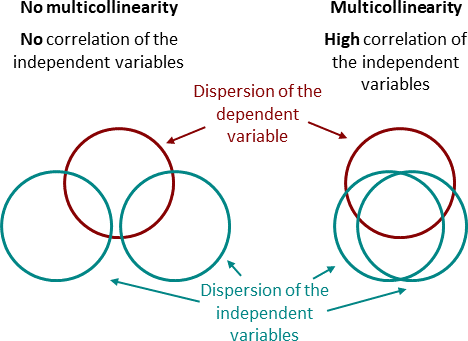

- X_1 과 X_2라는 두 변수가 있고, X_2 = b*X_1이라면, <br/>
같은 변수를 두 번 넣는 경우와 같다고 할 수 있고,    <br/>
이 경우 최소제곱법에 의해 계산이 되지 않는다고 한다. <br/>
- 또한 다중공선성이 높아지면, 회귀계수의 표준오차도 비정상적으로 커지게 되고, <br/>
선형회귀의 계수의 유의성을 검정하는 T-test에서 회귀계수/ (회귀계수의 표준오차) 이기 때문에, 
표준오차가 비정상적으로 증가하게 되면, t값은 낮아지고 그 결과로 유의해야할 변수가 유의하지 않아보이게 된다 
- 결론적으로, 각 설명변수들의 종속변수에 대한 설명력(R^2)은 높아지나, 각 회귀계수의 표준오차가 매우 크게 나타난다. 

In [24]:
# 세 변수 다중회귀모델의 계수

fitted_multi_model.params

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64

In [25]:
# full모델의 회귀계수

fitted_multi_model2.params

const   -7.108827
CRIM    -0.045293
RM       5.092238
LSTAT   -0.565133
B        0.008974
TAX     -0.006025
AGE      0.023619
ZN       0.029377
NOX      3.483832
INDUS    0.029270
dtype: float64

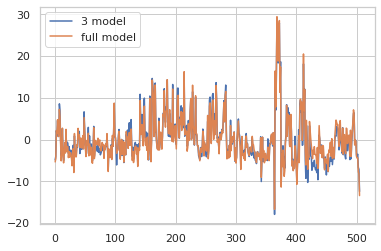

In [26]:
# 3개 모델과 full모델의 잔차비교

import matplotlib.pyplot as plt
fitted_multi_model.resid.plot(label = "3 model")
fitted_multi_model2.resid.plot(label = "full model")
plt.legend()

##### 2) 상관계수 및 산점도를 통한 다중공선성 확인

In [27]:
# 상관행렬 보기
x_data2.corr()

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
CRIM,1.000000,-0.219247,0.455621,-0.385064,0.582764,0.352734,-0.200469,0.420972,0.406583
RM,-0.219247,1.000000,-0.613808,0.128069,-0.292048,-0.240265,0.311991,-0.302188,-0.391676
LSTAT,0.455621,-0.613808,1.000000,-0.366087,0.543993,0.602339,-0.412995,0.590879,0.603800
B,-0.385064,0.128069,-0.366087,1.000000,-0.441808,-0.273534,0.175520,-0.380051,-0.356977
TAX,0.582764,-0.292048,0.543993,-0.441808,1.000000,0.506456,-0.314563,0.668023,0.720760
AGE,0.352734,-0.240265,0.602339,-0.273534,0.506456,1.000000,-0.569537,0.731470,0.644779
ZN,-0.200469,0.311991,-0.412995,0.175520,-0.314563,-0.569537,1.000000,-0.516604,-0.533828
NOX,0.420972,-0.302188,0.590879,-0.380051,0.668023,0.731470,-0.516604,1.000000,0.763651
INDUS,0.406583,-0.391676,0.603800,-0.356977,0.720760,0.644779,-0.533828,0.763651,1.000000


/tmp/ipykernel_13/1711684943.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


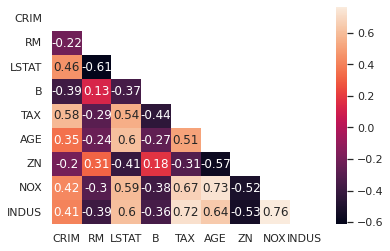

In [28]:
# 상관행렬 시각화
import seaborn as sns  #heatmap 만들기 위한 라이브러리

df = x_data2.corr()
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True  # Upper Triangle의 Mask를 True로

sns.heatmap(df, annot = True, mask = mask)
plt.show()

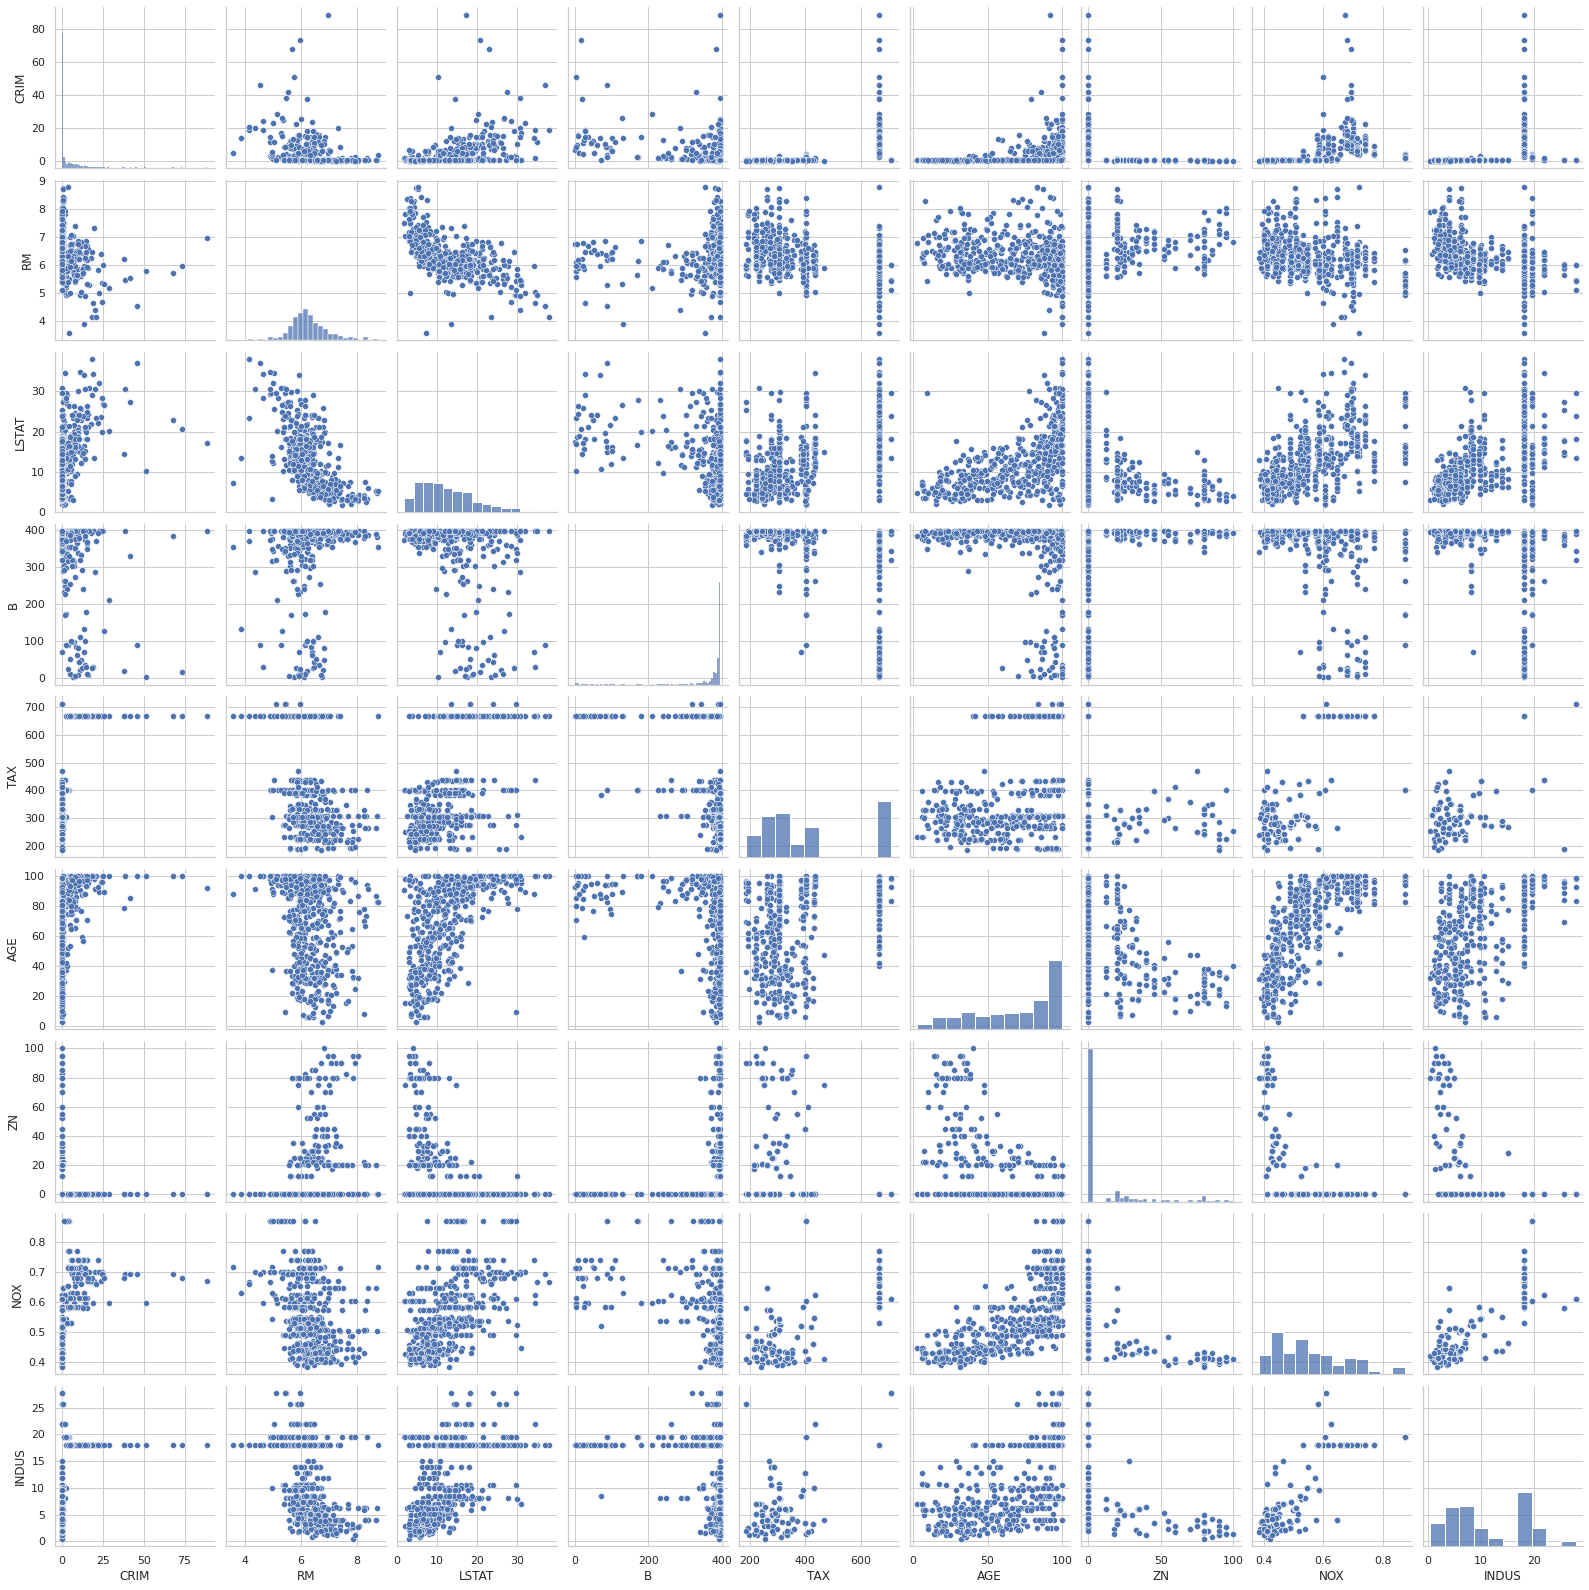

In [29]:
# 변수끼리 산점도를 시각화
sns.pairplot(x_data2)
plt.show()

###### 다중공선성을 일으킬 것으로 보이는 유력 후보

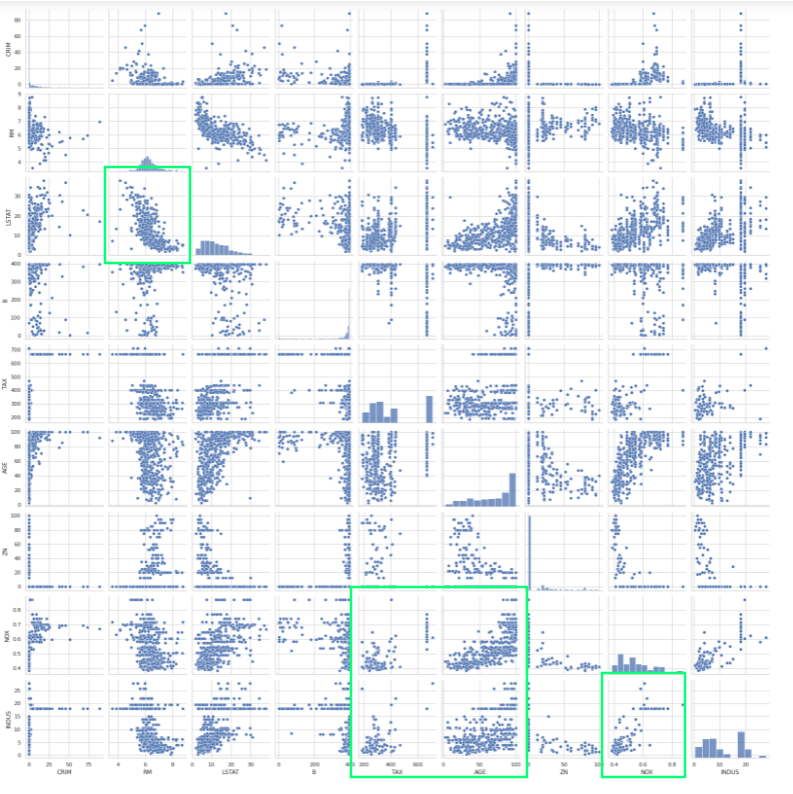

- LSTAT - RM : 주택 당 방의 개수와 인구 중 하위 계층 비율 사이에 음의 상관관계?
- NOX - TAX : TAX 재산세율이 높을수록, 일산화질소 농도가 높아진다?
- NOX - AGE : 오래된 건물의 비중이 높을 수록, 일산화질소 농도가 높아진다?
- INDUS - TAX : 재산세율이 높아질수록 비소매상업지역의 비율이 높아진다?
- INDUS - AGE  : 오래된 건물의 비중이 높아질 수록 비소매 상업지역의 비중이 높아진다?
- INDUS - NOX  : 일산화질소의 농도가 높아질수록 비소매 상업지역이 비율이 높아진다?

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재하여 
# 이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif["features"] = x_data2.columns
vif

,VIF Factor,features
0,1.917332,CRIM
1,46.535369,RM
2,8.844137,LSTAT
3,16.856737,B
4,19.923044,TAX
5,18.457503,AGE
6,2.086502,ZN
7,72.439753,NOX
8,12.642137,INDUS


#### Const의 높은 VIF지수

- a variable has a large mean but only a small variance <br/>
https://stackoverflow.com/questions/59694427/what-does-the-high-vif-for-the-constant-term-intercept-indicate

- The purpose of including the constant in the vif computation is to discover this kind of problems with the design matrix exog provided by the user. It would not show up if we compute vif on demeaned or standardized explanatory variables.

- design matrix : 각 집단을 구분하기 위하여 0, 1, －1 등의 의미없는 숫자로 표기한 행렬

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재하여 
# 이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.

vif = pd.DataFrame()
# variance_inflation_factor expects the presence of a constant in the matrix of explanatory variables. 
vif["VIF Factor"] = [variance_inflation_factor(x_data2_.values, i) for i in range(x_data2_.shape[1])]
vif["features"] = x_data2_.columns
vif

,VIF Factor,features
0,255.059610,const
1,1.636785,CRIM
2,1.801373,RM
3,2.913023,LSTAT
4,1.337941,B
5,2.911136,TAX
6,2.811076,AGE
7,1.687649,ZN
8,3.425736,NOX
9,3.476267,INDUS


###### variance_inflation_factor() 함수를 사용하지 않는 방식  참고
https://www.youtube.com/watch?v=qmt7ZZoiDwc

In [32]:
# nox 변수 제거 후 vif 확인

vif = pd.DataFrame()
x_data3 = x_data2.drop("NOX",axis=1)
vif["VIF Factor"] = [variance_inflation_factor(x_data3.values, i) for i in range(x_data3.shape[1])]
vif["features"] = x_data3.columns
vif

,VIF Factor,features
0,1.916648,CRIM
1,30.806301,RM
2,8.171214,LSTAT
3,16.735751,B
4,18.727105,TAX
5,16.339792,AGE
6,2.074500,ZN
7,11.217461,INDUS


In [33]:
# RM 변수 제거후 VIF확인

vif = pd.DataFrame()
x_data4 = x_data3.drop("RM",axis = 1)
vif["VIF Factor"] = [variance_inflation_factor(x_data4.values, i) for i in range(x_data4.shape[1])]
vif["features"] = x_data4.columns
vif

,VIF Factor,features
0,1.907517,CRIM
1,7.933529,LSTAT
2,7.442569,B
3,16.233237,TAX
4,13.765377,AGE
5,1.820070,ZN
6,11.116823,INDUS


In [34]:
# nox 변수를 제거한 x_data3 상수항 추가 후 회귀모델 적합시키기
# nox, rm 변수를 제거한 x_data4 상수항 추가 후 회귀모델 적합시키기

x_data3_ = sm.add_constant(x_data3, has_constant = "add")
x_data4_ = sm.add_constant(x_data4, has_constant = "add")

model_vif = sm.OLS(target, x_data3_)
fitted_model_vif = model_vif.fit()
fitted_model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     121.6
Date:                Mon, 28 Mar 2022   Prob (F-statistic):          7.62e-112
Time:                        06:33:07   Log-Likelihood:                -1566.0
No. Observations:                 506   AIC:                             3150.
Df Residuals:                     497   BIC:                             3188.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9162      3.596     -1.645      0.101     -12.981       1.149
CRIM          -0.0451      0.036     -1.264      0.207      -0.115       0.025
RM             5.1027      0.458     11.138      0.000       4.203       6.003
LSTAT         -0.5628      0.057     -9.825      0.000      -0.675      -0.450
B              0.0087      0.003      2.880      0.004       0.003       0.015
TAX           -0.0056      0.002     -2.344      0.019      -0.010      -0.001
AGE            0.0287      0.013      2.179      0.030       0.003       0.055
ZN             0.0284      0.013      2.130      0.034       0.002       0.055
INDUS          0.0486      0.062      0.789      0.431      -0.072       0.170
==============================================================================
Omnibus:                      193.530   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.773
Skew:                           1.677   Prob(JB):                    5.98e-184
Kurtosis:                       8.364   Cond. No.                     8.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
model_vif2 = sm.OLS(target,x_data4_)
fitted_model_vif2 = model_vif2.fit()

# 두 vif를 통한 변수제거 회귀모델의 결과를 비교

fitted_model_vif2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     97.20
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           5.53e-89
Time:                        06:33:07   Log-Likelihood:                -1622.3
No. Observations:                 506   AIC:                             3261.
Df Residuals:                     498   BIC:                             3294.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.6634      1.844     16.087      0.000      26.041      33.286
CRIM          -0.0329      0.040     -0.825      0.410      -0.111       0.045
LSTAT         -0.9256      0.053    -17.589      0.000      -1.029      -0.822
B              0.0046      0.003      1.384      0.167      -0.002       0.011
TAX           -0.0048      0.003     -1.814      0.070      -0.010       0.000
AGE            0.0703      0.014      4.993      0.000       0.043       0.098
ZN             0.0513      0.015      3.490      0.001       0.022       0.080
INDUS         -0.0357      0.068     -0.523      0.601      -0.170       0.098
==============================================================================
Omnibus:                      138.742   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.077
Skew:                           1.427   Prob(JB):                     2.32e-69
Kurtosis:                       5.617   Cond. No.                     3.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 시각화

###### 학습 / 검증데이터 분할

In [36]:
X = x_data2_
y = target

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 1)
# 학습데이터와 검증데이터를 7:3으로 분리한다.
# random_state고정을 통해 그때마다 똑같은 값을 분류하도록 한다.

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(354, 10) (152, 10) (354, 1) (152, 1)


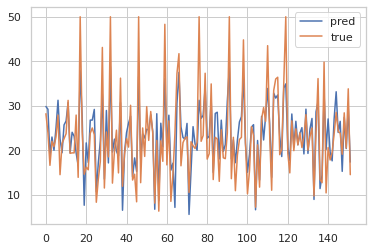

In [37]:
# train_x에 상수항 추가 후 최귀모델 적합

fit_train1 = sm.OLS(train_y,train_x)
fit_train1 = fit_train1.fit()

# 검증데이터에 대한 예측값과 true값 비교

plt.plot(np.array(fit_train1.predict(test_x)),label = "pred")
plt.plot(np.array(test_y),label = "true")
plt.legend()
plt.show()

###### 잔차도

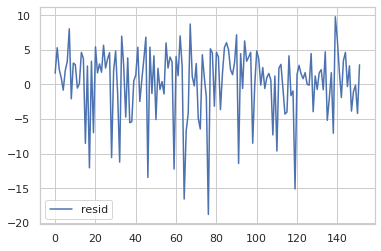

In [38]:
plt.plot(np.array(fit_train1.predict(test_x))-np.array(test_y).reshape(np.array(test_y).shape[0]),label = "resid")
plt.legend()
plt.show()

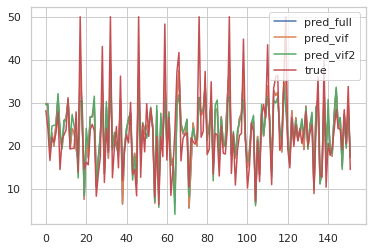

In [39]:
# x_data3와 x_data4 학습 검증데이터 분할

X = x_data3_
y = target
train_x2,test_x2,train_y2,test_y2 = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=1)

X = x_data4_
y = target
train_x3,test_x3,train_y3,test_y3 = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=1)

# x_data3/x_data4의 회귀모델 적합 (fit_train2,fit_train3)

fit_train2 = sm.OLS(train_y2,train_x2)
fit_train2 = fit_train2.fit()

fit_train3 = sm.OLS(train_y3,train_x3)
fit_train3 = fit_train3.fit()

# vif를 통해 NOX를 지운 데이터 x_data3 , NOX,RM을 지운 데이터 x_data4 full모델 실제값 비교

plt.plot(np.array(fit_train1.predict(test_x)),label = "pred_full")
plt.plot(np.array(fit_train2.predict(test_x2)),label = "pred_vif")
plt.plot(np.array(fit_train3.predict(test_x3)),label = "pred_vif2")
plt.plot(np.array(test_y2), label = "true")
plt.legend()
plt.show()

#### MSE

In [40]:
from sklearn.metrics import mean_squared_error

#변수 제거가 이루어지지 않은 full모델
mse1 = mean_squared_error(y_true = test_y["Target"], y_pred = fit_train1.predict(test_x))

#변수 NOX만 제거한 모델
mse2 = mean_squared_error(y_true = test_y["Target"], y_pred = fit_train2.predict(test_x2))

#변수 NOX와 RM 두 개를 제거한 모델
mse3 = mean_squared_error(y_true = test_y["Target"], y_pred = fit_train3.predict(test_x3))

print(mse1)
print(mse2)
print(mse3)

26.14863146881989
26.14006260984655
38.788453179128304


# 페널티 회귀분석 

독립변수(Parameter)의 개수 대비, 샘플(표본)의 개수가 부족할 때 주로 사용한다. <br/>
Ridge Regression과 Rasso Regression 모두 일반 선형회귀분석에 비해 기울기 계수가 줄어드는 특징이 있다

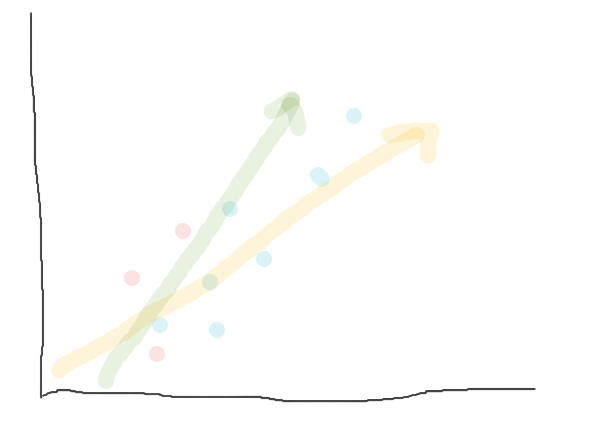

### 3. Ridge 회귀( 페널티 회귀분석 1 )

- 모델의 설명력에 기여하지 못하는 독립변수의 회귀계수의 크기를 0에 근접하도록 축소 
- 하지만 어떠한 회귀계수도 0으로 만들지는 못한다
- 따라서 뒤에 설명할 Lasso 회귀 분석에 비해, 모든 독립변수가 유의미할 때 효과가 좋다 

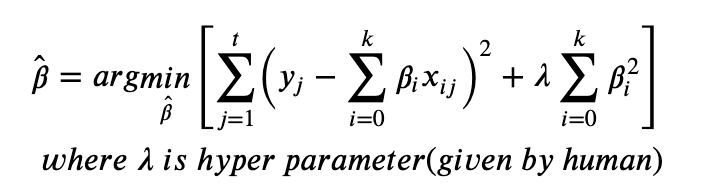

###### 문제 예시

데이터 8:2로 분할하고 릿지 회귀 적용. alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을 때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산

알파는 람다값

In [44]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [45]:
x_train, x_test, y_train, y_test = train_test_split(boston_data, target, test_size = 0.2, shuffle = True, random_state = 2022)

In [46]:
alpha = np.arange(0,1,0.1)
table = pd.DataFrame(columns = ['R_Square'])
for i in alpha:
    rr = Ridge(alpha=i)
    rr.fit(x_train,y_train)
    y_pred_train = rr.predict(x_train)
    table.loc[i] = r2_score(y_train,y_pred_train)
table.index.name = "alpha"
table

,R_Square
alpha,
0.0,0.756083
0.1,0.756046
0.2,0.755955
0.3,0.755831
0.4,0.755687
0.5,0.755531
0.6,0.755370
0.7,0.755207
0.8,0.755046


In [47]:
table.min()

R_Square    0.754888
dtype: float64

In [48]:
table.idxmin()

R_Square    0.9
dtype: float64

In [49]:
rr = Ridge(alpha= 0.9) 
rr.fit(x_train,y_train)
y_pred_test = rr.predict(x_test)

In [50]:
# 결정계수
r2_score(y_test,y_pred_test)

0.6126619214020301

해당 모델의 설명력이 61.2% 정도된다.

In [51]:
# RMSE 
mean_squared_error(y_test,y_pred_test, squared = False) 
# squared = True(Default) --> MSE
# squared = False --> RMSE

5.2623948179415025

###### 참고) statsmodels에서는 Rasso와 ElasticNet만 가능
OLS.fit_regularized(method='sqrt_lasso', alpha=0.0, L1_wt=1.0, start_params=None, profile_scale=False, refit=False, **kwargs)

### 4. Rasso 회귀 (페널티 회귀분석 2)

- 모델의 설명력에 기여하지 못하는 독립변수의 회귀계수를 축소시킨다
- 실제로 회귀계수의 크기를 0으로 만들 수 있기 때문에, Ridge 회귀분석에 비해 모델의 복잡도를 더 낮춘다
- 독립변수의 개수를 줄이려고 할 때 유용하다. 

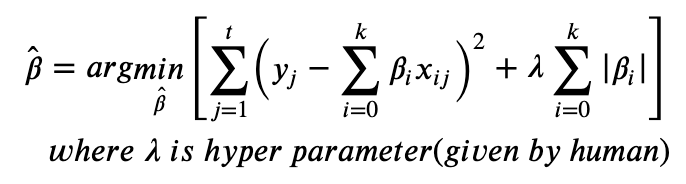

###### 문제 예시

데이터 8:2로 분할하고 라쏘 회귀 적용. alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을 때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산

In [52]:
from sklearn.linear_model import Lasso

In [53]:
x_train, x_test, y_train, y_test = train_test_split(boston_data, target, test_size = 0.2, shuffle = True, random_state = 2022)

In [54]:
alpha = np.arange(0,1,0.1)
table = pd.DataFrame(columns = ['R_Square'])
for i in alpha:
    ls = Lasso(alpha=i)
    ls.fit(x_train,y_train)
    y_pred_train = ls.predict(x_train)
    table.loc[i] = r2_score(y_train,y_pred_train)
table.index.name = "alpha"
table

/tmp/ipykernel_13/680834151.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  ls.fit(x_train,y_train)
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.254e+03, tolerance: 3.488e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


,R_Square
alpha,
0.0,0.756083
0.1,0.746982
0.2,0.742552
0.3,0.740333
0.4,0.737225
0.5,0.733399
0.6,0.729035
0.7,0.723512
0.8,0.717140


In [55]:
table.min()

R_Square    0.709919
dtype: float64

In [56]:
table.idxmin()

R_Square    0.9
dtype: float64

In [57]:
rr = Lasso(alpha= 0.9) 
rr.fit(x_train,y_train)
y_pred_test = rr.predict(x_test)

In [58]:
# 결정계수
r2_score(y_test,y_pred_test)

0.647042119109801

해당 모델의 설명력이 64.7% 정도된다.

In [59]:
# RMSE 
mean_squared_error(y_test,y_pred_test, squared = False) 
# squared = True(Default) --> MSE
# squared = False --> RMSE

5.023423271744192

### 5. 로지스틱 회귀

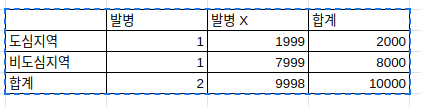

###### 승산 (Odds)
https://www.theanalysisfactor.com/why-use-odds-ratios/ (Why odds?)

임의의 사건 A가 발생하지 않을 확률 대비 일어날 확률의 비율을 뜻하는 개념 <br/>
odds = P(A)/(1−P(A))  <br/>
  
이후에 독립변수 x의 변화가 Y의 확률에 얼만큼 영향을 미칠지 나타낼 수 있는 효과를 지니게 된다 

- 도심지역 주민의 발병 오즈  = (1/2000)/(1-(1/2000)) = (1/1999)
- 비도심지역 주민의 발병 오즈  = (1/8000)/(1-(1/8000)) = (1/7999)

###### 오즈비

오즈를 오즈로 나눈 비율

목적: 비교를 위해서

- 오즈비 : (1/1999)/(1/7999) --> 4.0015

###### 로짓 (Logit)

오즈비에 Log를 취한 값 

###### 결론
0,1 이라는 이항 종속변수가 오즈 - > 오즈비 -> 로짓을 거치면서 연속변수처럼 회귀분석이 가능하게 만들어준다

https://ratsgo.github.io/machine%20learning/2017/04/02/logistic/

이항변수가 종속변수인 경우에 사용한다. 
Sigmoid 함수를 사용하는 분류/예측 모델로, 보통 임계값을 설정하여 0 or 1로 값을 변환시킨다.

In [60]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import time 
import sklearn

In [61]:
# 경로 수정 필요 
ploan = pd.read_csv("~/aiffel/Kaggle/Kaggle_data/Personal Loan.csv") 

In [62]:
ploan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [63]:
# 사용하지 않을 변수 제거 ID, Zip Code 
# ID, Zip Code 고유 값으로 예측시 활용도 떨어진다

ploan_processed = ploan.dropna().drop(["ID","ZIP Code"], axis=1, inplace = False)

In [64]:
# 회귀모델에서 b0를 위한 상수항 추가

ploan_processed = sm.add_constant(ploan_processed,has_constant = "add")
ploan_processed.head()

,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,1.0,45,19,34,3,1.5,1,0,0,1,0,0,0
2,1.0,39,15,11,1,1.0,1,0,0,0,0,0,0
3,1.0,35,9,100,1,2.7,2,0,0,0,0,0,0
4,1.0,35,8,45,4,1.0,2,0,0,0,0,0,1


- Experience 경력
- Income 수입
- Famliy 가족단위
- CCAvg 월 카드사용량 
- Education 교육수준 (1: undergrad; 2, Graduate; 3; Advance )
- Mortgage 가계대출
- Securities account 유가증권계좌유무
- CD account 양도예금증서 계좌 유무
- Online 온라인계좌유무
- CreidtCard 신용카드유무 

###### 설명변수 X와 타겟변수 Y/학습과 평가 데이터를 분리 

In [65]:
# 대출여부는 1 or 0으로 결정된다. 즉 target이 1/0의 값을 갖기에
# 로지스틱 회귀모형이 적합하다.

feature_columns = ploan_processed.columns.difference(["Personal Loan"])
X = ploan_processed[feature_columns]
y = ploan_processed["Personal Loan"]

train_x, test_x ,train_y, test_y = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


In [66]:
# 로지스틱 모형 적합

model = sm.Logit(train_y, train_x)  # sklearn과 x,y 들어가는 순서 반대
results = model.fit()    

Optimization terminated successfully.
         Current function value: 0.135959
         Iterations 9


###### 주의!
Logistic Regression의 Summary 바로 해석하면 안된다

In [67]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Mon, 28 Mar 2022   Pseudo R-squ.:                  0.5881
Time:                        06:34:16   Log-Likelihood:                -237.93
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                1.397e-138
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.0016      0.101     -0.016      0.987      -0.200       0.196
CCAvg                  0.0954      0.063      1.526      0.127      -0.027       0.218
CD Account             4.3674      0.531      8.226      0.000       3.327       5.408
CreditCard            -1.3552      0.349     -3.881      0.000      -2.040      -0.671
Education              1.4684      0.180      8.162      0.000       1.116       1.821
Experience             0.0165      0.101      0.163      0.870      -0.181       0.214
Family                 0.7160      0.125      5.734      0.000       0.471       0.961
Income                 0.0499      0.004     12.500      0.000       0.042       0.058
Mortgage               0.0006      0.001      0.634      0.526      -0.001       0.002
Online                -0.4918      0.262     -1.880      0.060      -1.005       0.021
Securities Account    -1.4553      0.484     -3.007      0.003      -2.404      -0.507
const                -12.5215      2.730     -4.586      0.000     -17.873      -7.170
======================================================================================
"""

In [68]:
# Log가 취해진 결과로 바로 해석하면 안된다
results.params

Age                   -0.001631
CCAvg                  0.095392
CD Account             4.367360
CreditCard            -1.355179
Education              1.468420
Experience             0.016455
Family                 0.715961
Income                 0.049919
Mortgage               0.000596
Online                -0.491809
Securities Account    -1.455320
const                -12.521527
dtype: float64

###### Logistic Regression의 해석

In [69]:
# 오즈비로 변환 
np.exp(results.params)

Age                    0.998370
CCAvg                  1.100090
CD Account            78.835214
CreditCard             0.257901
Education              4.342370
Experience             1.016592
Family                 2.046153
Income                 1.051186
Mortgage               1.000596
Online                 0.611519
Securities Account     0.233326
const                  0.000004
dtype: float64

- 나이가 한 살 많을수록 대출할 확률이 0.998370배가 된다. (즉, 줄어든다)
- 가족 구성원이 한명 많을수록 대출할 확률이 2.04배 높다
- 수입이 1단위 높을수록 대출할 확률이 1.05배 높다

- 나이가 많을수록 대출가능성 떨어진다?
- CD Account 영향 너무 큰 것은 아닌지

In [70]:
pred_y = results.predict(test_x)
pred_y

1816    0.005733
1195    0.102950
2085    0.005262
406     0.025856
303     0.926229
          ...   
1676    0.184499
680     0.000842
233     0.005965
2373    0.829847
2088    0.003645
Length: 750, dtype: float64

In [71]:
# 임계값 함수

def cut_off(y, threshold) :
    Y = y.copy()  # 대문자 Y를 새로운 변수로 하여 기존의 y값에 영향이 가지 않도록 한다.
    Y[Y>threshold] = 1
    Y[Y<threshold] = 0
    return Y.astype(int)
    
pred_Y = cut_off(pred_y, 0.5)
pred_Y

1816    0
1195    0
2085    0
406     0
303     1
       ..
1676    0
680     0
233     0
2373    1
2088    0
Length: 750, dtype: int64

In [72]:
# confusion matrix (분류 표를 나타낸 행렬)
# 임계값 0.5 기준 

cfmat = confusion_matrix(test_y,pred_Y)
print(cfmat)

# 행 : 실제
# 열 : 예측 

[[667   6]
 [ 29  48]]


In [73]:
# confusion matrix accuracy(정확도) 계산함수

def acc(cfmat):
    return (cfmat[0,0] + cfmat[1,1])/(cfmat[0,0] + cfmat[1,1] + cfmat[0,1] + cfmat[1,0])
acc(cfmat)

0.9533333333333334

###### 임계값에 따른 정확도 확인

In [74]:
threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns = ['ACC'])
for i in threshold :
    pred_Y = cut_off(pred_y,i)
    cfmat = confusion_matrix(test_y,pred_Y)
    table.loc[i] = acc(cfmat)
table.index.name = "threshold"
table.columns.name = "performance"
table

performance,ACC
threshold,
0.0,0.102667
0.1,0.900000
0.2,0.937333
0.3,0.946667
0.4,0.953333
0.5,0.953333
0.6,0.950667
0.7,0.949333
0.8,0.942667


In [75]:
pred_Y = cut_off(pred_y,0.5)

###### ROC 커브 : 이진 분류기의 성능 표현 

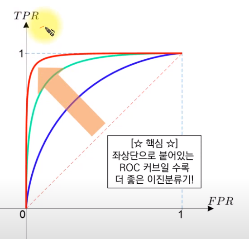

AUC: 0.8072306593851913


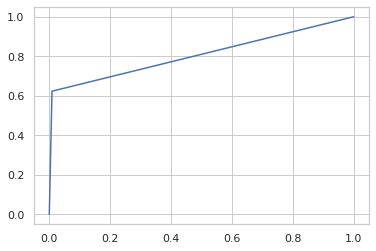

In [76]:
# sklearn에서 ROC 패키지 활용 (statsmodels 대신에 sklearn 사용한 이유)
fpr, tpr, thresholds = sklearn.metrics.roc_curve(test_y,pred_Y,pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)

# AUC
auc = np.trapz(tpr,fpr) # 복합 사다리꼴 규칙을 사용하여 주어진 축을 따라 적분합니다.
print("AUC:",auc)

https://www.youtube.com/watch?v=n7EoYT5kDO4

###### TPR

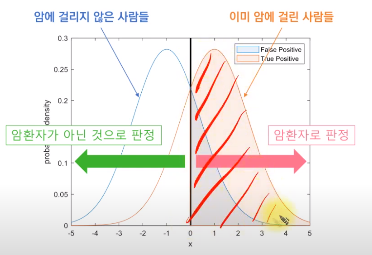

###### FPR 

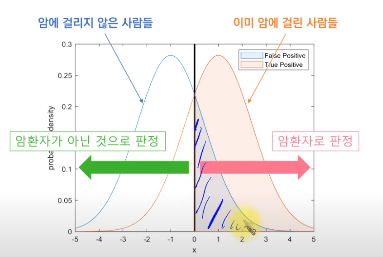

의사 A : 겁이 없고 성격이 급해 모든 환자를 암환자로 판단함 
- 실제로 암에 걸린 사람들은 모두 암 환자로 판정 : True Positive Rate 높음
- 암에 걸리지 않은 사람들도 모두 암환자로 판정 : False Positive Rate높음 

의사 B: 겁이 많아 모든 환자를 정상으로 판단함 
- 실제로 암에 걸린 사람들이 모두 정상으로 판정 : True Positive Rate 낮음
- 암에 걸리지 않은 사람들도 모두 정상으로 판정 : False Positive Rate 낮음

- ROC (Receiver Operator Curve )
- AUC  ( Area Under Curve ) : ROC 곡선 아래의 영역을 의미한다. 

ROC의 X축 : FPR (1- 특이도) FP/(FP + TN)  <br/>
ROC의 Y축 : TPR(민감도)    TP/TP+FN 

Binary Classifier의 임계값은 0.5에 고정되어 있었지만, 
ROC Curve에서는 가능한 모든 Threshold 값에 대해서  TPR(True의 Recall 값), FPR (False의 Recall 값)을 계산하여 그린다. 

AUC(ROC 밑의 면적)는 1에 가까울수록 모델의 성능이 좋고, ROC는 (0,1)로 그래프가 가까이 갈 수록 정확도가 좋다

https://welcome-to-dewy-world.tistory.com/11  <br/>
https://yamalab.tistory.com/82